In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths = ["trades_round_1_day_-2_wn.csv", "trades_round_1_day_-1_wn.csv", "trades_round_1_day_0_wn.csv", "trades_round_3_day_0_wn.csv", "trades_round_3_day_1_wn.csv", "trades_round_4_day_1_wn.csv", "trades_round_3_day_2_wn.csv", "trades_round_4_day_2_wn.csv", "trades_round_4_day_3_wn.csv"]
days = [0,1,2,2,3,3,4,4,5]

df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * days[i]
    df = pd.concat([df, new_df])

bidask_paths = ['prices_round_1_day_-2.csv', 'prices_round_2_day_-1.csv', 'prices_round_3_day_0.csv', 'prices_round_4_day_1.csv', 'prices_round_4_day_2.csv', 'prices_round_4_day_3.csv']

bidask_df = pd.DataFrame()
for i, path in enumerate(bidask_paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    bidask_df = pd.concat([bidask_df, new_df])

In [3]:
gift_ba = bidask_df[bidask_df["product"]=="GIFT_BASKET"]
roses_ba = bidask_df[bidask_df["product"]=="ROSES"]
choc_ba = bidask_df[bidask_df["product"]=="CHOCOLATE"]
strawberries_ba = bidask_df[bidask_df["product"]=="STRAWBERRIES"]

In [4]:
gift_trade = df[df["symbol"]=="GIFT_BASKET"]
roses_trade = df[df["symbol"]=="ROSES"]
choc_trade = df[df["symbol"]=="CHOCOLATE"]
strawberries_trade = df[df["symbol"]=="STRAWBERRIES"]

In [5]:
print(gift_trade)

      timestamp    buyer    seller       symbol   currency    price  quantity
4       2001000     Ruby    Vinnie  GIFT_BASKET  SEASHELLS  71360.0         2
13      2003500  Rhianna    Vinnie  GIFT_BASKET  SEASHELLS  71340.0         2
17      2003800  Rhianna    Vinnie  GIFT_BASKET  SEASHELLS  71339.0         1
35      2009500   Vinnie      Ruby  GIFT_BASKET  SEASHELLS  71386.0         1
47      2013000     Ruby  Vladimir  GIFT_BASKET  SEASHELLS  71400.0         9
...         ...      ...       ...          ...        ...      ...       ...
3734    4982100     Ruby  Vladimir  GIFT_BASKET  SEASHELLS  69608.0         8
3737    4983300   Vinnie      Ruby  GIFT_BASKET  SEASHELLS  69567.0         1
3787    4996300   Vinnie   Rhianna  GIFT_BASKET  SEASHELLS  69480.0         1
3796    4997900     Ruby  Vladimir  GIFT_BASKET  SEASHELLS  69478.0         5
3800    4998900   Vinnie      Ruby  GIFT_BASKET  SEASHELLS  69550.0         5

[1765 rows x 7 columns]


## graphing Vladimir vs market

In [8]:
# analyze vinnie vs market
vl_buys = df[df["buyer"] == "Vladimir"]
vl_sells = df[df["seller"] == "Vladimir"]

market_trades = df[(df["buyer"] != "Vladimir") & (df["seller"] != "Vladimir")]

# Vladimir gift basket

In [6]:
gift = df[df["symbol"] == "GIFT_BASKET"]
rose = df[df["symbol"] == "ROSES"]
choc = df[df["symbol"] == "CHOCOLATE"]
straw = df[df["symbol"] == "STRAWBERRIES"]

In [8]:
vl_buys = gift[gift["buyer"] == "Vladimir"]
vl_sells = gift[gift["seller"] == "Vladimir"]

market_trades = gift[(gift["buyer"] != "Vladimir") & (gift["seller"] != "Vladimir")]

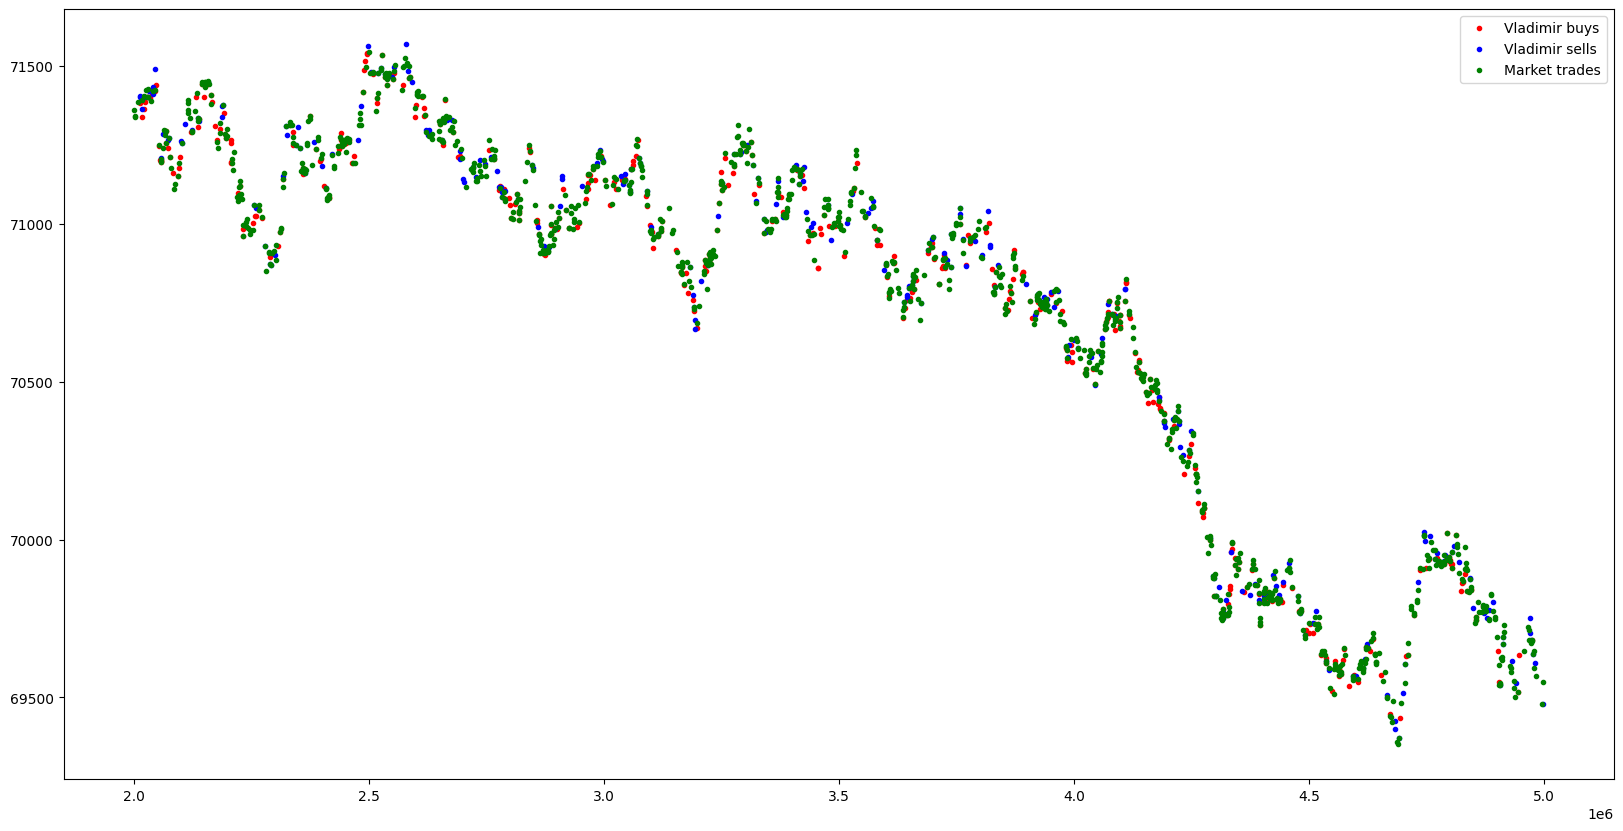

In [14]:
plt.figure(figsize=(20,10))
plt.plot(vl_buys["timestamp"], vl_buys["price"], "ro", markersize=3, label="Vladimir buys")
plt.plot(vl_sells["timestamp"], vl_sells["price"], "bo", markersize=3, label="Vladimir sells")
# plt.plot(market_trades["timestamp"], market_trades["price"], "go", markersize=3, label="Market trades")
plt.legend()